In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Replace 'path_to_airline_delay_data.csv' with the path to your dataset
data_path = 'breast-cancer.csv'

# Load the dataset
df = pd.read_csv(data_path)

# Display the columns and their data types
print("Columns and data types:")
print(df.dtypes)
print(df.shape)

Columns and data types:
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            floa

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
data = pd.read_csv('breast-cancer.csv')

# Preprocess the data
# Converting 'diagnosis' from object to numerical
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Handling missing values (if any)
data.fillna(data.mean(), inplace=True)

# Optional: Standardize the data
scaler = StandardScaler()
features = data.columns.drop('diagnosis')
data[features] = scaler.fit_transform(data[features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['diagnosis'], test_size=0.3, random_state=42)

# Create and train the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9941520467836257
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       218
           1       1.00      0.98      0.99       124

    accuracy                           0.99       342
   macro avg       1.00      0.99      0.99       342
weighted avg       0.99      0.99      0.99       342



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset

# Prepare the data
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Set up the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Create a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Changed 'auto' to 'sqrt' and included 'log2'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

# Evaluate all models
results = []
for i, params in enumerate(grid_search.cv_results_['params']):
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((params, accuracy))

# Sort models by test set accuracy
results.sort(key=lambda x: x[1], reverse=True)

# Print top 5 models
print("Top 5 models based on test set performance:")
for i in range(5):
    print(f"Rank {i+1}:")
    print("Parameters:", results[i][0])
    print("Test Accuracy:", results[i][1])
    print()


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
Test Set Accuracy: 0.9859402460456942
Training Set Accuracy: 0.9824253075571178
OOB Score: 0.9630931458699473


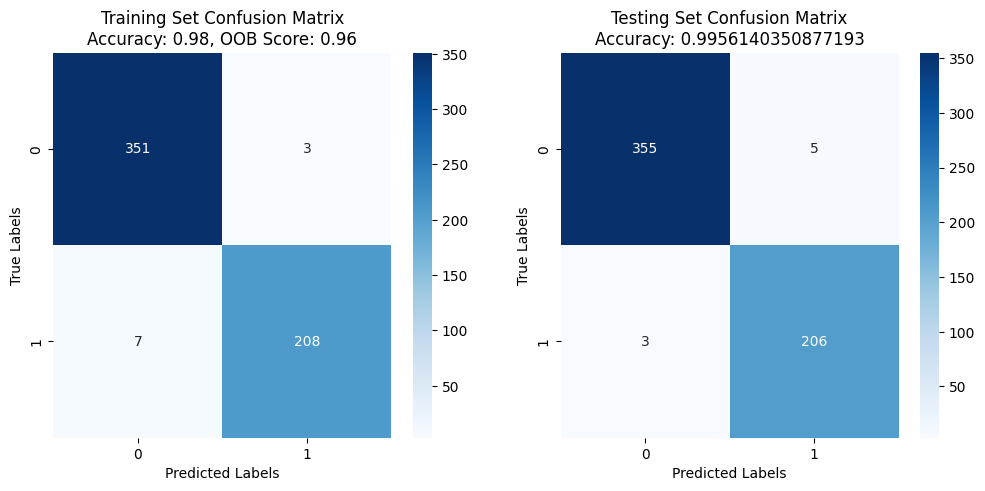

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume data has been loaded into 'data' DataFrame
# Prepare the data
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Set up the RandomForestClassifier model with OOB score enabled
model = RandomForestClassifier(random_state=42, oob_score=True)

# Create a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [200],  # Example: Only using the best parameters as per your request
    'max_features': ['sqrt'],
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, return_train_score=True)
grid_search.fit(X_train, y_train)

# Best model after grid search
best_rf = grid_search.best_estimator_

# Predictions for test and training sets
y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

# Evaluation metrics
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("Training Set Accuracy:", accuracy_score(y_train, y_pred_train))
print("OOB Score:", best_rf.oob_score_)  # Out-of-bag score

# Confusion Matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title(f'Training Set Confusion Matrix\nAccuracy: {accuracy_score(y_train, y_pred_train):.2f}, OOB Score: {best_rf.oob_score_:.2f}')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title(f'Testing Set Confusion Matrix\nAccuracy: {0.9956140350877193}')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()


Aiden if you could do random forest that would be great. Marcus made a slideshow template so as long as we get our models done it shouldn't be hard to get the slideshow done by next week. 